In [36]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import re
import time
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)
from wordcloud import WordCloud, STOPWORDS

In [37]:
browser = webdriver.Chrome()
url  = "https://www.google.com/maps/place/WOW+Momo/@22.5689632,88.4129147,15z/data=!4m10!1m2!2m1!1swow+momo+ecospace+chineses+restaurant!3m6!1s0x3a0275d7bb8b320d:0x50e6359cecad6ea!8m2!3d22.5689543!4d88.4309581!15sCiV3b3cgbW9tbyBlY29zcGFjZSBjaGluZXNlcyByZXN0YXVyYW50WiciJXdvdyBtb21vIGVjb3NwYWNlIGNoaW5lc2VzIHJlc3RhdXJhbnSSARJjaGluZXNlX3Jlc3RhdXJhbnSaASRDaGREU1VoTk1HOW5TMFZKUTBGblNVTmpiV0kzWm0xQlJSQULgAQA!16s%2Fg%2F124s_fw34"
browser.get(url)
browser.maximize_window()

In [38]:
page = BeautifulSoup( browser.page_source,"lxml")

In [39]:
review_btn = browser.find_element(By.CLASS_NAME,"F7nice")
review_btn.click()


In [ ]:
point_to_start_scroll = browser.find_element(By.CSS_SELECTOR,'#QA0Szd > div > div > div.w6VYqd > div.bJzME.Hu9e2e.tTVLSc > div > div.e07Vkf.kA9KIf > div > div > div.m6QErb.DxyBCb.kA9KIf.dS8AEf')
scroll = 0
while scroll < 120:
    # this will scroll 10 times
    browser.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + arguments[0].offsetHeight;',point_to_start_scroll)
    scroll += 1
      # add appropriate wait here, of course. 1-2 seconds each
    time.sleep(2)

NameError: name 'browser' is not defined

In [41]:
# name determination
name = []
name_struct = browser.find_elements(By.CLASS_NAME, "d4r55")
for value in name_struct:
    my_name = value.text
    if my_name not in name:
        name.append(my_name)
    
# print(name)
# print()

In [42]:
# time determination
date = []
time_struct = browser.find_elements(By.CLASS_NAME, "rsqaWe")
for value in time_struct:
    date.append(value.text)
# print(date)
# print()

In [43]:
# description determination
description = []
desc_struct = browser.find_elements(By.CLASS_NAME,"wiI7pd")
for value in desc_struct:
    description.append(value.text[:-1])
# print(description)

In [44]:
# no.of user_reviews
cus_review_no = []
cus_review_struct = browser.find_elements(By.CLASS_NAME,"RfnDt")
for value in cus_review_struct:
    cus_review_no.append(value.text[14:24])
# print(cus_review_no)

In [45]:
# rating determination
rating = []
class_struct = browser.find_elements(By.CLASS_NAME,"kvMYJc")
for value in class_struct:
        # btn = browser.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[48]/div/div[3]/div[4]/div[1]/span[2]') 
        btn = value.get_attribute('aria-label')[0:2]
        rating.append(btn)
# print(rating)

In [46]:
my_data = {"Name":name,"Rating":rating,"Time":date,"User_total_Review":cus_review_no,"Description":description}
# print(my_data)

In [47]:
df = pd.DataFrame.from_dict(my_data)
print(df)

                      Name Rating         Time User_total_Review  \
0            Mausam Thakur      5  2 weeks ago        17 reviews   
1            Debangi Mitra      4   a year ago        81 reviews   
2                Tania Dey      4  a month ago        41 reviews   
3         Kazi Bakibillaho      3  2 years ago        191 review   
4             Souvik Nandi      4  3 years ago        11 reviews   
..                     ...    ...          ...               ...   
145  Aanubrata Chakraborty      4  5 years ago        398 review   
146      Rukmini Mukherjee      4  3 years ago        128 review   
147            Rajiv Khaya      5  3 years ago                     
148      oindrila majumdar      4  3 years ago        68 reviews   
149          Sumanto Ghosh      5  4 years ago        162 review   

                                           Description  
0    Wow! Momo have started their winter campaign, ...  
1    It's a small quick bite outlet located near SD...  
2    The tas

In [49]:
# extracting dataframe to csv
df.to_csv('test_data1.csv',index=False)

In [50]:
df = pd.read_csv("test_data1.csv")

In [51]:
df = df.sort_values("Rating",ascending = False)
df

,Name,Rating,Time,User_total_Review,Description
0,Mausam Thakur,5,2 weeks ago,17 reviews,"Wow! Momo have started their winter campaign, ..."
68,Nausheen fatma,5,3 years ago,124 review,Yummyy...try moburger here...it is worth your ...
89,Abhishek Das,5,5 years ago,46 reviews,Wow momo is well known for the food quality......
87,Rajesh Thakur,5,3 years ago,58 reviews,Worderdul Momo in different verrriant.eg choco...
84,Dusayanta Prasad,5,5 years ago,99 reviews,"Very delicious momo is being provided here, no..."
...,...,...,...,...,...
127,Abhishek Shaw,1,3 years ago,68 reviews,"Visited this store today, and ordered one sizz..."
69,S Choudhuri,1,5 years ago,17 reviews,Waiting half an hour for a plate of steamed mo...
114,Anindo Chatterjee,1,3 years ago,12 reviews,"The service is exceptionally slow, maybe staff..."
77,Soma Das,1,5 years ago,NaN,"Very poor service, I have orders 3 plate momo ..."


In [52]:
five_star = df['Rating'].value_counts()[5]
# print(five_star)
four_star = df['Rating'].value_counts()[4]
# print(four_star)
three_star = df['Rating'].value_counts()[3]
two_star = df['Rating'].value_counts()[2]
one_star = df['Rating'].value_counts()[1]

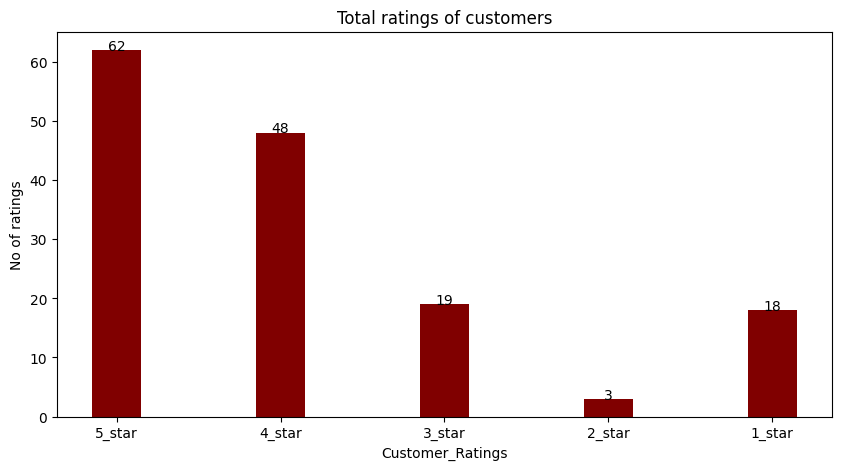

In [53]:
ratings_data = {'5_star':five_star,'4_star':four_star,'3_star':three_star,'2_star':two_star,'1_star':one_star}

ratings = list(ratings_data.keys())
values = list(ratings_data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
plt.bar(ratings,values,color = 'maroon',width = 0.3)
add_labels(ratings,values)
plt.xlabel("Customer_Ratings")
plt.ylabel("No of ratings")
plt.title("Total ratings of customers")
plt.show()

In [54]:
df.Description

0      Wow! Momo have started their winter campaign, ...
68     Yummyy...try moburger here...it is worth your ...
89     Wow momo is well known for the food quality......
87     Worderdul Momo in different verrriant.eg choco...
84     Very delicious momo is being provided here, no...
                             ...                        
127    Visited this store today, and ordered one sizz...
69     Waiting half an hour for a plate of steamed mo...
114    The service is exceptionally slow, maybe staff...
77     Very poor service, I have orders 3 plate momo ...
97     At the billing counter a guy named Upangshu as...
Name: Description, Length: 150, dtype: object

In [55]:
len(df.Description)

150

In [56]:
review_example = df.Description[68]
review_example

'Yummyy...try moburger here...it is worth your money 😍 '

In [57]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', review_example)) 

Yummyy...try moburger here...it is worth your money  


In [58]:
review_example = re.sub('[^A-Za-z]+','', review_example)
review_example

'Yummyytrymoburgerhereitisworthyourmoney'

In [59]:
review_example = review_example.lower().split()
review_example

['yummyytrymoburgerhereitisworthyourmoney']

In [60]:
rt = lambda x:re.sub("[^a-zA-Z]",' ',str(x))
df['Description'] = df['Description'].map(rt)
df['Description'] = df['Description'].str.lower()
df

,Name,Rating,Time,User_total_Review,Description
0,Mausam Thakur,5,2 weeks ago,17 reviews,wow momo have started their winter campaign ...
68,Nausheen fatma,5,3 years ago,124 review,yummyy try moburger here it is worth your ...
89,Abhishek Das,5,5 years ago,46 reviews,wow momo is well known for the food quality ...
87,Rajesh Thakur,5,3 years ago,58 reviews,worderdul momo in different verrriant eg choco...
84,Dusayanta Prasad,5,5 years ago,99 reviews,very delicious momo is being provided here no...
...,...,...,...,...,...
127,Abhishek Shaw,1,3 years ago,68 reviews,visited this store today and ordered one sizz...
69,S Choudhuri,1,5 years ago,17 reviews,waiting half an hour for a plate of steamed mo...
114,Anindo Chatterjee,1,3 years ago,12 reviews,the service is exceptionally slow maybe staff...
77,Soma Das,1,5 years ago,NaN,very poor service i have orders plate momo ...


In [61]:
# sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df[['polarity','subjectivity']] = df['Description'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))
for index,row in df['Description'].iteritems():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    


    if neg>pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos>neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"
        

In [62]:
df.to_csv('sentiment_data1.csv',index=False)

In [63]:
my_data = pd.read_csv('sentiment_data1.csv')

In [64]:
my_data['sentiment'].value_counts()

Positive    123
Negative     18
Neutral       9
Name: sentiment, dtype: int64

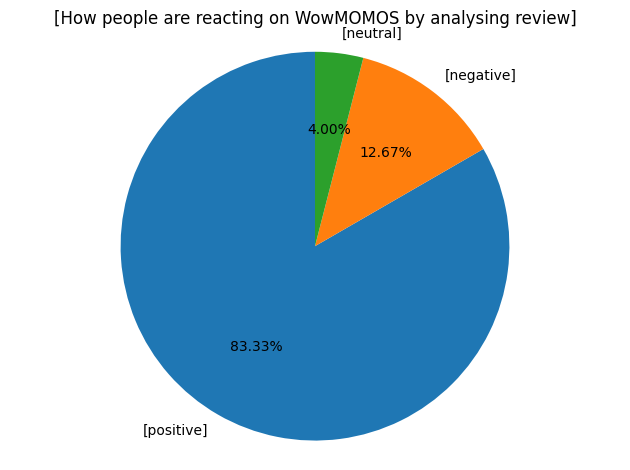

In [65]:
def percentage(upper,lower):
    return 100*float(upper)/float(lower)

positive  = percentage(125,150)
negative  = percentage(19,150)
neutral  = percentage(6,150)
labels=['[positive]', '[negative]','[neutral]']
sizes=[positive,negative,neutral]
colors=['yellowgreen',"gold","red"]
chart=plt.pie(sizes,labels=labels, startangle=90, autopct='%.2f%%')
plt.title("[How people are reacting on {} by analysing review]".format("WowMOMOS"))
plt.axis("equal")
plt.tight_layout()
plt.show()

In [67]:
my_df = pd.read_csv('sentiment_data1.csv')
my_df.head()

,Name,Rating,Time,User_total_Review,Description,polarity,subjectivity,sentiment
0,Mausam Thakur,5,2 weeks ago,17 reviews,wow momo have started their winter campaign ...,0.050000,0.550000,Positive
1,Nausheen fatma,5,3 years ago,124 review,yummyy try moburger here it is worth your ...,0.300000,0.100000,Positive
2,Abhishek Das,5,5 years ago,46 reviews,wow momo is well known for the food quality ...,0.152381,0.690476,Positive
3,Rajesh Thakur,5,3 years ago,58 reviews,worderdul momo in different verrriant eg choco...,0.000000,0.600000,Neutral
4,Dusayanta Prasad,5,5 years ago,99 reviews,very delicious momo is being provided here no...,0.295000,0.675000,Positive


In [68]:
data = my_df.drop(my_df[my_df.Rating >3].index)
data.head()

,Name,Rating,Time,User_total_Review,Description,polarity,subjectivity,sentiment
110,Adrita Roy,3,3 years ago,121 review,the most impressive thing about this place is ...,0.350833,0.612500,Positive
111,Anik Ghosh,3,3 years ago,18 reviews,the counter staff hard sold a discounted chi...,-0.230556,0.563889,Positive
112,Ateev Saxena,3,3 years ago,131 review,food is not as tasty as some other chains,-0.125000,0.375000,Neutral
113,Sommath Jana,3,11 months ago,14 reviews,all products price is too high,0.160000,0.540000,Neutral
114,Kazi Bakibillaho,3,2 years ago,191 review,a place for momo lover enjoy every bite of i...,0.387500,0.408333,Positive


In [69]:
my_data = data.drop( (data[data.sentiment == 'Positive'].index)  )
my_data.head()

,Name,Rating,Time,User_total_Review,Description,polarity,subjectivity,sentiment
112,Ateev Saxena,3,3 years ago,131 review,food is not as tasty as some other chains,-0.125000,0.375000,Neutral
113,Sommath Jana,3,11 months ago,14 reviews,all products price is too high,0.160000,0.540000,Neutral
122,Rahul Pramanik,3,3 years ago,57 reviews,food quality was pretty good but i had once a...,0.083333,0.755556,Negative
125,Ankana Choudhury,3,3 years ago,13 reviews,food was not upto the standard quality you get...,-0.106250,0.493750,Negative
127,Sharan Chatterjee,3,3 years ago,570 review,all as usual good but the very irritating p...,0.186000,0.570000,Negative


In [70]:
final  = my_data.drop(my_data[my_data.sentiment == 'Neutral'].index)
final

,Name,Rating,Time,User_total_Review,Description,polarity,subjectivity,sentiment
122,Rahul Pramanik,3,3 years ago,57 reviews,food quality was pretty good but i had once a...,0.083333,0.755556,Negative
125,Ankana Choudhury,3,3 years ago,13 reviews,food was not upto the standard quality you get...,-0.106250,0.493750,Negative
127,Sharan Chatterjee,3,3 years ago,570 review,all as usual good but the very irritating p...,0.186000,0.570000,Negative
129,Joysmita Saha,2,3 years ago,NaN,we ordered chicken moburg but the burgers ...,0.050000,0.775000,Negative
132,monidipa seth,1,3 years ago,NaN,the place is good but representatives is not ...,0.100000,0.800000,Negative
133,Swarnendu De (Sean),1,5 years ago,NaN,awful service quality is degrading every day ...,-0.473333,0.970000,Negative
134,Surajit Kundu,1,4 years ago,NaN,very sad no steamed momo no thukpa at pm...,-0.650000,1.000000,Negative
135,Ankan Sahoo,1,a year ago,NaN,world s worst mom s are served here,-1.000000,1.000000,Negative
139,Anisha Majumder,1,2 years ago,NaN,the worst experience of the day i have orde...,-1.000000,1.000000,Negative
140,Raju Kumar Gupta,1,8 months ago,NaN,very pathetic service i got hair in momos fill...,-1.000000,1.000000,Negative


In [71]:
rt = lambda x:re.sub("[^a-zA-Z]",' ',str(x))
final['Description'] = final['Description'].map(rt)
final['Description'] = final['Description'].str.lower()
final

,Name,Rating,Time,User_total_Review,Description,polarity,subjectivity,sentiment
122,Rahul Pramanik,3,3 years ago,57 reviews,food quality was pretty good but i had once a...,0.083333,0.755556,Negative
125,Ankana Choudhury,3,3 years ago,13 reviews,food was not upto the standard quality you get...,-0.106250,0.493750,Negative
127,Sharan Chatterjee,3,3 years ago,570 review,all as usual good but the very irritating p...,0.186000,0.570000,Negative
129,Joysmita Saha,2,3 years ago,NaN,we ordered chicken moburg but the burgers ...,0.050000,0.775000,Negative
132,monidipa seth,1,3 years ago,NaN,the place is good but representatives is not ...,0.100000,0.800000,Negative
133,Swarnendu De (Sean),1,5 years ago,NaN,awful service quality is degrading every day ...,-0.473333,0.970000,Negative
134,Surajit Kundu,1,4 years ago,NaN,very sad no steamed momo no thukpa at pm...,-0.650000,1.000000,Negative
135,Ankan Sahoo,1,a year ago,NaN,world s worst mom s are served here,-1.000000,1.000000,Negative
139,Anisha Majumder,1,2 years ago,NaN,the worst experience of the day i have orde...,-1.000000,1.000000,Negative
140,Raju Kumar Gupta,1,8 months ago,NaN,very pathetic service i got hair in momos fill...,-1.000000,1.000000,Negative


In [72]:
comment_words = ''
stopwords = set(STOPWORDS)

In [73]:
# iterate through the csv file
for val in final['Description']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

In [74]:
cmmnt  = comment_words.split(" ")
for word in cmmnt:
    if word == 'good':
        cmmnt.remove('good')
comment_words  = str(cmmnt)

In [75]:
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 5).generate(comment_words)

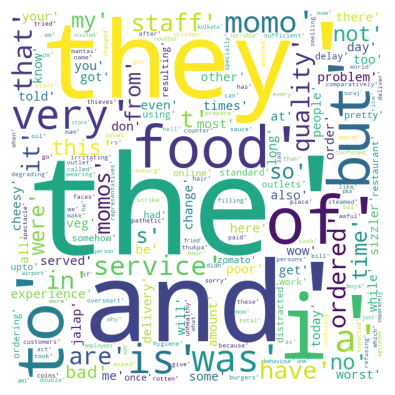

In [87]:
# plot the WordCloud image                      
plt.figure(figsize = (5,3.75), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()